# Unsupervised Machine Learning:Clustering 6.5 Gun Violence in US

1. [Import Libraries and Data](#lib)

2. [Check the Data](#check)

3. [The Elbow Technique](#elbow)

4. [k-means Clustering](#k-means)

In [7]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

<div id = "lib"></div>

In [8]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inliimport pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pickle  # Import pickle for saving encoders
ne

In [9]:
# Creating a path
path = r'C:\Users\rpa21\Gun Violence Analysis'

In [10]:
# importing data
df_guns3 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'guns_3.csv'), index_col = False)

<div id = "check"></div>

In [11]:
df_guns3.head()

,Unnamed: 0,incident_id,date,STATE_NAME,city_or_county,number_killed,number_injured,congressional_district,incident_characteristics,latitude,longitude,number_guns_involved,notes,participant_age,participant_age_group,year,day,month,place
0,0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,1.0,Julian Sims under investigation: Four Shot and...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,2013,Tuesday,January,"Mckeesport, Pennsylvania"
1,1,460726,2013-01-01,California,Hawthorne,1,3,43.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,-118.3330,1.0,Four Shot; One Killed; Unidentified shooter in...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,2013,Tuesday,January,"Hawthorne, California"
2,2,478855,2013-01-01,Ohio,Lorain,1,3,9.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,-82.1377,2.0,NaN,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,2013,Tuesday,January,"Lorain, Ohio"
3,3,478925,2013-01-05,Colorado,Aurora,4,0,6.0,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,-104.8020,1.0,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,2013,Saturday,January,"Aurora, Colorado"
4,4,478959,2013-01-07,North Carolina,Greensboro,2,2,6.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,-79.9569,2.0,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,2013,Monday,January,"Greensboro, North Carolina"


In [12]:
df_guns3.shape

(239677, 19)

In [15]:
df_guns3 = df_guns3.drop(columns = ['Unnamed: 0'])

In [16]:
df_guns3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   incident_id               239677 non-null  int64  
 1   date                      239677 non-null  object 
 2   STATE_NAME                239677 non-null  object 
 3   city_or_county            239677 non-null  object 
 4   number_killed             239677 non-null  int64  
 5   number_injured            239677 non-null  int64  
 6   congressional_district    227733 non-null  float64
 7   incident_characteristics  239351 non-null  object 
 8   latitude                  231754 non-null  float64
 9   longitude                 231754 non-null  float64
 10  number_guns_involved      239677 non-null  float64
 11  notes                     158660 non-null  object 
 12  participant_age           147379 non-null  object 
 13  participant_age_group     197558 non-null  o

In [42]:
vars_list = ['number_killed', 'number_injured','number_guns_involved', 'latitude', 'longitude']

In [43]:
vars_list

['number_killed',
 'number_injured',
 'number_guns_involved',
 'latitude',
 'longitude']

In [44]:
df_GV = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'guns_3.csv'), usecols = vars_list)

In [45]:
df_GV.isnull().sum()

number_killed              0
number_injured             0
latitude                7923
longitude               7923
number_guns_involved       0
dtype: int64

In [47]:
df_GV2 = df_GV[df_GV['latitude'].isnull() == False]

In [48]:
df_GV2 = df_GV[df_GV['longitude'].isnull() == False]

In [49]:
df_GV2.shape

(231754, 5)

### The elbow technique

<div id = "elbow"></div>

In [50]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.d

In [51]:
score = [kmeans[i].fit(df_GV2).score(df_GV2) for i in range(len(kmeans))]
# Creates a score that represents a rate of variation for the given cluster option.

score

C:\Users\rpa21\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rpa21\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rpa21\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rpa21\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-57120598.33521688,
 -22711738.29413595,
 -15487605.65466158,
 -12838508.588334426,
 -10518228.139102608,
 -8580164.720129281,
 -6736651.551467558,
 -5875786.500626838,
 -5357260.586740338]

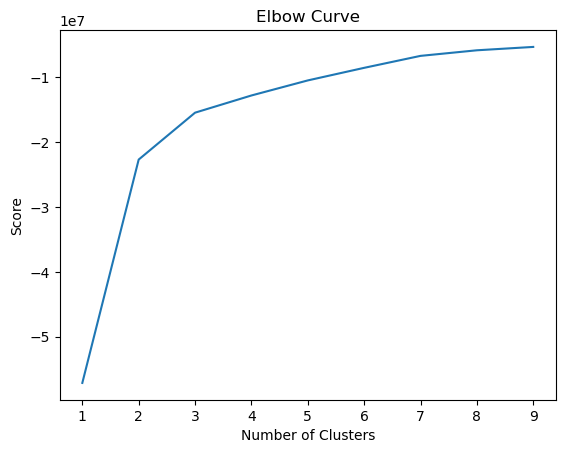

In [52]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There is a large jump from two to three on the x-axis. The curve then, straightens out. 
This means that the optimal count for the clusters is three.

### k-means Clustering

<div id = "k-means"></div>

In [53]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [54]:
# Fit the k-means object to the data.

kmeans.fit(df_GV2)

C:\Users\rpa21\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [56]:
df_GV2['clusters'] = kmeans.fit_predict(df_GV2)

C:\Users\rpa21\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rpa21\AppData\Local\Temp\ipykernel_29144\666027587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GV2['clusters'] = kmeans.fit_predict(df_GV2)


In [57]:
df_GV2.head()

,number_killed,number_injured,latitude,longitude,number_guns_involved,clusters
0,0,4,40.3467,-79.8559,1.0,0
1,1,3,33.9090,-118.3330,1.0,1
2,1,3,41.4455,-82.1377,2.0,0
3,4,0,39.6518,-104.8020,1.0,2
4,2,2,36.1140,-79.9569,2.0,0


In [58]:
df_GV2['clusters'].value_counts()

clusters
0    107019
2     92890
1     31845
Name: count, dtype: int64

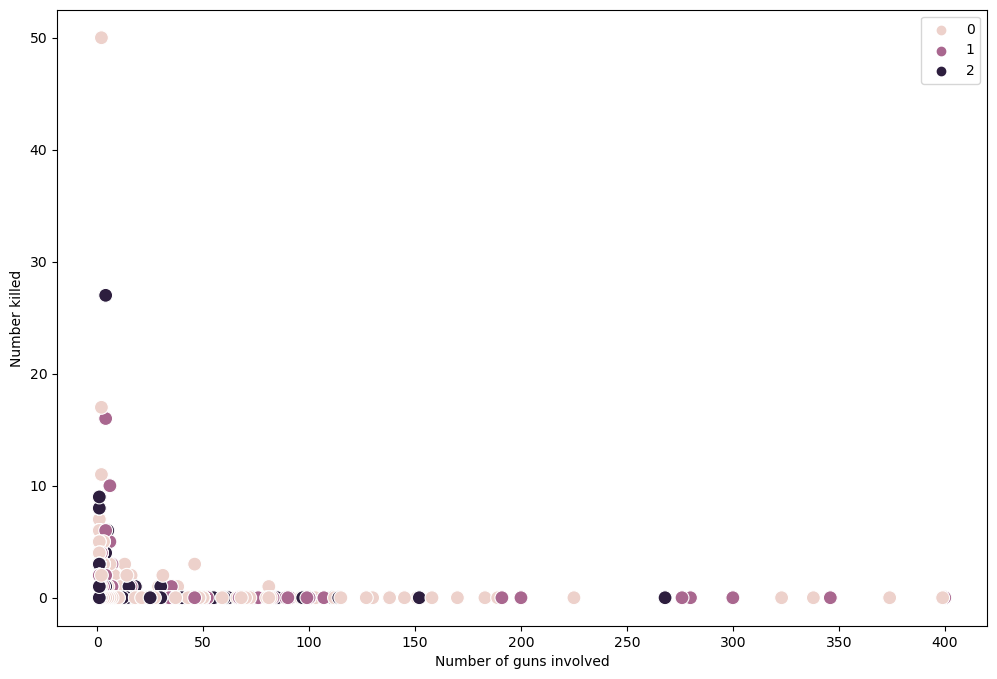

In [71]:
# Plot the clusters for the 'number_of_guns' involved and 'number_killed' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_GV2['number_guns_involved'], y=df_GV2['number_killed'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of guns involved') # Label x-axis.
plt.ylabel('Number killed') # Label y-axis.
plt.show()


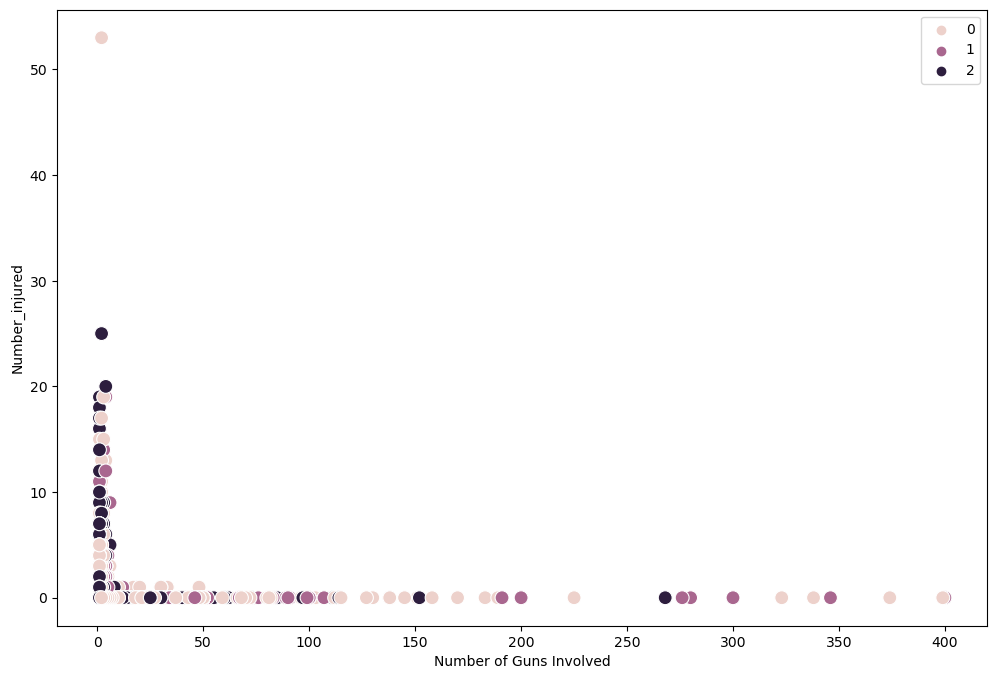

In [61]:
# Plot the clusters for the 'number_guns_involved' and 'number_injured' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_GV2['number_guns_involved'], y=df_GV2['number_injured'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Number of Guns Involved') 
plt.ylabel('Number_injured') 
plt.show()

The most populated clusters, in the two charts, are the '0' values. These represent guns involved where no one was injured or killed. 
They span all number of guns involved and numbered  killed or dinjured. 
The clustering of 1 and 2 guns involved shows the number injured does not increase
with the number of guns involved, suggesting it takes just one or two guns to create a violent and deadly situation.  

In [65]:
df_GV2.loc[df_GV2['clusters'] == 2, 'cluster'] = 'dark purple'
df_GV2.loc[df_GV2['clusters'] == 1, 'cluster'] = 'purple'
df_GV2.loc[df_GV2['clusters'] == 0, 'cluster'] = 'pink'

In [66]:
df_GV2.groupby('cluster').agg({'number_killed':['mean', 'median'], 
                         'number_injured':['mean', 'median'], 
                         'number_guns_involved':['mean', 'median']})

number_killed        number_injured        number_guns_involved  \
                     mean median           mean median                 mean   
cluster                                                                       
dark purple      0.253504    0.0       0.533351    0.0             1.163688   
pink             0.221792    0.0       0.485241    0.0             1.209122   
purple           0.310692    0.0       0.410174    0.0             1.393374   

                    
            median  
cluster             
dark purple    1.0  
pink           1.0  
purple         1.0

The statistics do not vary much.  This suggests that the number of guns involved doe not 
reflect the number of people injured or killed in gun violence.  

The large number of guns in the data are also from raids where there was only one gun used or a few guns used but many found 
or confiscated by officers.  In hte realm of gun violence, this comes in many forms.  This can be any number of guns used but not necessarily resulting in injuries or deaths.  It is an interesting study.  I think there are so many factors/variables that need ot be analyzed that are not present in this dataframe, in order to determine the reasons for gun violence.  